# Distance Calculation Handson

Distance to line(left): 1.6955100822242166 m


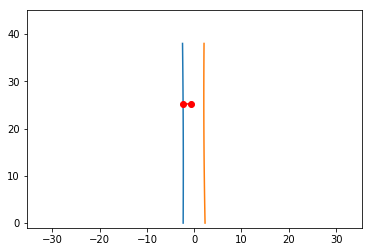

In [30]:
import numpy as np
import shapely.geometry as geom
from shapely.geometry import Point
import matplotlib.pyplot as plt

class NearestPoint(object):
    def __init__(self, left_line, right_line, ax):
        self.left_line = left_line
        self.right_line = right_line
        self.ax = ax
        ax.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, xy_point, side):
        assert side == 'left' or side == 'right', 'Type among left or right'
        distance = self.left_line.distance(xy_point)
        print(f'Distance to line({side}):', distance, 'm')
            
    def draw_segment(self, object_list):
        # determine the points whether those are at the left side or right side.
        for i in object_list:
            if i[0] <= 0:
                left_point_list.append(Point(i[0], i[1]))
            else:
                right_point_list.append(Point(i[0], i[1]))
        # Draw the lateral lane about the left objects
        for point in left_point_list:
            point_on_line = self.left_line.interpolate(self.left_line.project(point))
            self.ax.plot([point.x, point_on_line.x], [point.y, point_on_line.y], 
                     color='red', marker='o', scalex=False, scaley=False)
            fig.canvas.draw()
            # get the distance in meter unit
            self.__call__(point, 'left')
        # Draw the lateral lane about the right objects
        for point in right_point_list:
            point_on_line = self.right_line.interpolate(self.right_line.project(point))
            self.ax.plot([point.x, point_on_line.x], [point.y, point_on_line.y], 
                     color='red', marker='o', scalex=False, scaley=False)
            fig.canvas.draw()
            # get the distance in meter unit
            self.__call__(point, 'right')


if __name__ == '__main__':
    # get the path of 3D points on lanes
    l_coords = np.loadtxt('/home/kaai/chicago_ws/src/first_pkg/src/left_lane.txt')
    r_coords = np.loadtxt('/home/kaai/chicago_ws/src/first_pkg/src/right_lane.txt')
    left_line = geom.LineString(l_coords)
    right_line = geom.LineString(r_coords)
    
    # define object locations
    object_list = [[-0.66, 25.21],[-7.22, 38.47], [-4.43, 50.24]]
    left_point_list = []
    right_point_list = []
    max_point = float(l_coords[l_coords.shape[0] - 1][1]) # indicate the maximum value from lane equation
    # remove the object point which has bigger value than the maximum point
    for i in range(len(object_list)):
        if object_list[i][1] > max_point:
            del object_list[i:]
            break

    # Plotting Section
    fig, ax = plt.subplots()
    ax.plot(*l_coords.T)
    ax.plot(*r_coords.T)
    ax.axis('equal')
    # Set the frame
    ax.set_xlim(-10, 10)
    ax.set_ylim(-1, 45)
    
    # Make the class
    distance_class = NearestPoint(left_line, right_line, ax)
    distance_class.draw_segment(object_list)
    
    
    plt.show()